## Same models, just developing nations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import make_scorer

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV



pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)


In [2]:
# read in the dataframe

df = pd.read_csv("Life_Expectancy_No_Missing_Vals.csv").set_index('Unnamed: 0')
df = df[df.status == 'Developing']

In [3]:
cont = ['adult_mortality','infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'thinness__10-19_years', 'thinness_5-9_years',
       'gdp', 'population', 'income_composition_of_resources', 'schooling']

In [4]:
# Now, lets get a df of all our features

features = df[['adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
 'hepatitis_b', 'measles','bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
 'hiv/aids', 'gdp', 'population', 'thinness__10-19_years', 'thinness_5-9_years', 'income_composition_of_resources',
 'schooling']]

# Target Histogram for Reference

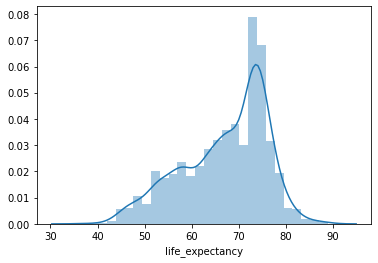

In [5]:
sns.distplot(df.life_expectancy)

# First Model - Nothing Fancy

Our first model to get a baseline idea will simply put our predictor variables against our target variable. Note we will apply a standard scaler to all our models so we are working in a standard scale.

In [6]:
X1 = features.copy()
y1 = df.life_expectancy

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X1.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X1.columns)

In [9]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 4.352202918773226


In [10]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)
print(f"R2: {metrics.r2_score(y_test, y_test_pred)}")

Testing Root Mean Squared Error: 4.25078446631348
Training:  4.352202918773226 vs. Testing:  4.25078446631348
R2: 0.7822044631884684


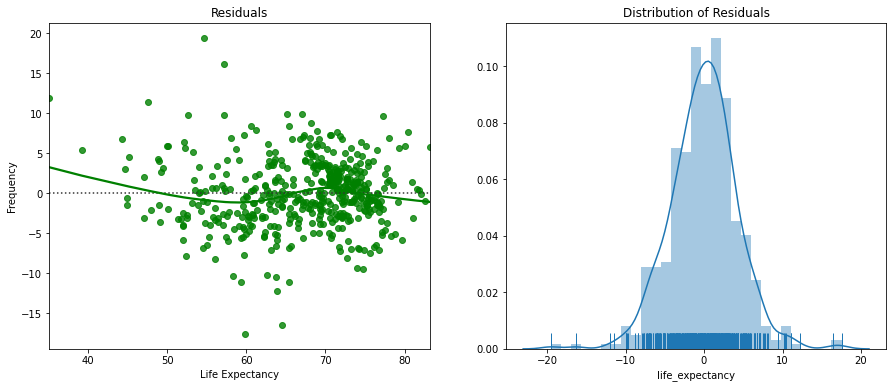

In [11]:
fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(121)
sns.residplot(y_test_pred, y_test, lowess=True, color="g", ax=ax1)
ax1.set_title("Residuals")
ax1.set_xlabel("Life Expectancy")

ax2 = plt.subplot(122)
sns.distplot((y_test_pred- y_test), kde=True, rug=True, ax=ax2)
ax2.set_title("Distribution of Residuals")
ax1.set_ylabel("Frequency")
plt.show()



In [12]:
X1 = sm.add_constant(X1)
model = sm.OLS(y1,X1)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     443.1
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:59:18   Log-Likelihood:                -6968.1
No. Observations:                2416   AIC:                         1.397e+04
Df Residuals:                    2397   BIC:                         1.408e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              47.4917      0.564     84.228      0.000      46.386      48.597
adult_mortality                    -0.0105      0.005     -2.277      0.023      -0.020      -0.001
infant_deaths                       0.1044      0.009     11.463      0.000       0.087       0.122
alcohol                             0.0046      0.031      0.148      0.882      -0.056       0.065
percentage_expenditure              0.0061      0.003      1.785      0.074      -0.001       0.013
hepatitis_b                        -0.0037      0.005     -0.811      0.417      -0.013       0.005
measles                          1.857e-06   8.28e-06      0.224      0.823   -1.44e-05    1.81e-05
bmi                                 0.0661      0.006     10.828      0.000       0.054       0.078
under-five_deaths                  -0.0780      0.007    -11.681      0.000      -0.091      -0.065
polio                               0.0287      0.005      5.790      0.000       0.019       0.038
total_expenditure                   0.0771      0.043      1.786      0.074      -0.008       0.162
diphtheria                          0.0337      0.005      6.195      0.000       0.023       0.044
hiv/aids                           -0.6360      0.018    -35.674      0.000      -0.671      -0.601
gdp                                 0.0001   1.25e-05      8.632      0.000    8.35e-05       0.000
population                       2.269e-10    1.8e-09      0.126      0.900    -3.3e-09    3.76e-09
thinness__10-19_years              -0.0520      0.054     -0.959      0.337      -0.158       0.054
thinness_5-9_years                  0.0232      0.054      0.433      0.665      -0.082       0.128
income_composition_of_resources     5.8889      0.701      8.395      0.000       4.513       7.264
schooling                           0.8948      0.050     18.000      0.000       0.797       0.992
==============================================================================
Omnibus:                      120.606   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.909
Skew:                          -0.070   Prob(JB):                     1.99e-93
Kurtosis:                       5.055   Cond. No.                     4.96e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Second Model - Tweak the first, remove large p-values

This model won't be too different, we want to see what happens when we remove statistically insignificant features. We determines which to remove based on any feature that had a p-value < .05 from our last OLS summary

In [13]:
X2 = features[['adult_mortality', 'infant_deaths', 'percentage_expenditure',
       'bmi', 'under-five_deaths', 'polio',
       'diphtheria', 'hiv/aids', 'gdp', 
       'income_composition_of_resources', 'schooling']].copy()
y2 = df.life_expectancy

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [15]:
scaler2 = StandardScaler()

# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=X2.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=X2.columns)

In [16]:
#instantiate a linear regression object
lm2 = LinearRegression()

#fit the linear regression to the data
lm2 = lm2.fit(X_train, y_train)

y_train_pred = lm2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 4.358472297303539


In [17]:
#use fitted model to predict on the test examples
y_test_pred = lm2.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)
print(f"R2: {metrics.r2_score(y_test, y_test_pred)}")

Testing Root Mean Squared Error: 4.246697384648317
Training:  4.358472297303539 vs. Testing:  4.246697384648317
R2: 0.7826230777847014


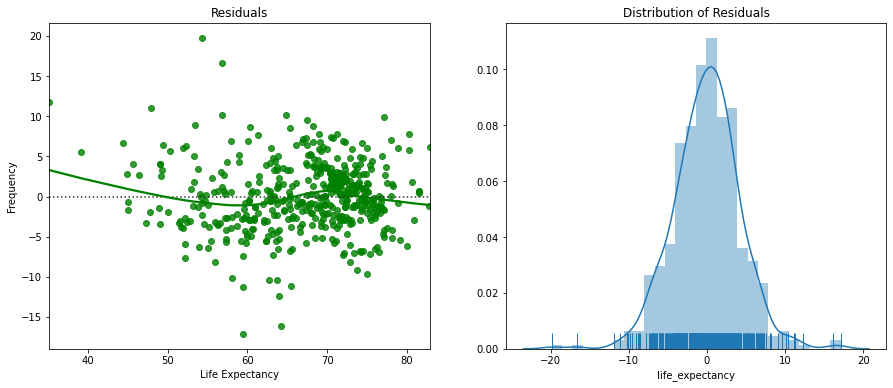

In [18]:
fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(121)
sns.residplot(y_test_pred, y_test, lowess=True, color="g", ax=ax1)
ax1.set_title("Residuals")
ax1.set_xlabel("Life Expectancy")

ax2 = plt.subplot(122)
sns.distplot((y_test_pred- y_test), kde=True, rug=True, ax=ax2)
ax2.set_title("Distribution of Residuals")
ax1.set_ylabel("Frequency")
plt.show()

In [19]:
X2 = sm.add_constant(X2)
model = sm.OLS(y2,X2)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     724.6
Date:                Fri, 11 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:59:19   Log-Likelihood:                -6971.4
No. Observations:                2416   AIC:                         1.397e+04
Df Residuals:                    2404   BIC:                         1.404e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              47.3682      0.465    101.945      0.000      46.457      48.279
adult_mortality                    -0.0100      0.005     -2.192      0.028      -0.019      -0.001
infant_deaths                       0.1033      0.009     11.766      0.000       0.086       0.121
percentage_expenditure              0.0064      0.003      1.874      0.061      -0.000       0.013
bmi                                 0.0696      0.006     12.445      0.000       0.059       0.081
under-five_deaths                  -0.0774      0.006    -11.924      0.000      -0.090      -0.065
polio                               0.0281      0.005      5.763      0.000       0.019       0.038
diphtheria                          0.0323      0.005      6.534      0.000       0.023       0.042
hiv/aids                           -0.6342      0.017    -36.315      0.000      -0.668      -0.600
gdp                                 0.0001   1.23e-05      8.635      0.000    8.21e-05       0.000
income_composition_of_resources     5.8483      0.697      8.391      0.000       4.482       7.215
schooling                           0.9104      0.048     19.150      0.000       0.817       1.004
==============================================================================
Omnibus:                      116.468   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              409.060
Skew:                          -0.031   Prob(JB):                     1.49e-89
Kurtosis:                       5.015   Cond. No.                     7.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Third Model - Poly 2 degree without removing any features (we will remove later)

From the above p-values, we can see that all of them are significant. But, our model can probably still be improved. To see where we are missing some of our target's unexplained variance, we will create a polynomial model to see some relations. 



In [20]:
X3 = features.copy()
y3 = df.life_expectancy

In [21]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(X3)
poly2_columns = poly_2.get_feature_names(X3.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__10-19_years,thinness_5-9_years,income_composition_of_resources,schooling,adult_mortality^2,adult_mortality infant_deaths,adult_mortality alcohol,adult_mortality percentage_expenditure,adult_mortality hepatitis_b,adult_mortality measles,adult_mortality bmi,adult_mortality under-five_deaths,adult_mortality polio,adult_mortality total_expenditure,adult_mortality diphtheria,adult_mortality hiv/aids,adult_mortality gdp,adult_mortality population,adult_mortality thinness__10-19_years,adult_mortality thinness_5-9_years,adult_mortality income_composition_of_resources,adult_mortality schooling,infant_deaths^2,infant_deaths alcohol,infant_deaths percentage_expenditure,infant_deaths hepatitis_b,infant_deaths measles,infant_deaths bmi,infant_deaths under-five_deaths,infant_deaths polio,infant_deaths total_expenditure,infant_deaths diphtheria,infant_deaths hiv/aids,infant_deaths gdp,infant_deaths population,infant_deaths thinness__10-19_years,infant_deaths thinness_5-9_years,infant_deaths income_composition_of_resources,infant_deaths schooling,alcohol^2,alcohol percentage_expenditure,alcohol hepatitis_b,alcohol measles,alcohol bmi,alcohol under-five_deaths,alcohol polio,alcohol total_expenditure,alcohol diphtheria,alcohol hiv/aids,alcohol gdp,alcohol population,alcohol thinness__10-19_years,alcohol thinness_5-9_years,alcohol income_composition_of_resources,alcohol schooling,percentage_expenditure^2,percentage_expenditure hepatitis_b,percentage_expenditure measles,percentage_expenditure bmi,percentage_expenditure under-five_deaths,percentage_expenditure polio,percentage_expenditure total_expenditure,percentage_expenditure diphtheria,percentage_expenditure hiv/aids,percentage_expenditure gdp,percentage_expenditure population,percentage_expenditure thinness__10-19_years,percentage_expenditure thinness_5-9_years,percentage_expenditure income_composition_of_resources,percentage_expenditure schooling,hepatitis_b^2,hepatitis_b measles,hepatitis_b bmi,hepatitis_b under-five_deaths,hepatitis_b polio,hepatitis_b total_expenditure,hepatitis_b diphtheria,hepatitis_b hiv/aids,hepatitis_b gdp,hepatitis_b population,hepatitis_b thinness__10-19_years,hepatitis_b thinness_5-9_years,hepatitis_b income_composition_of_resources,hepatitis_b schooling,measles^2,measles bmi,measles under-five_deaths,measles polio,measles total_expenditure,measles diphtheria,measles hiv/aids,measles gdp,measles population,measles thinness__10-19_years,measles thinness_5-9_years,measles income_composition_of_resources,measles schooling,bmi^2,bmi under-five_deaths,bmi polio,bmi total_expenditure,bmi diphtheria,bmi hiv/aids,bmi gdp,bmi population,bmi thinness__10-19_years,bmi thinness_5-9_years,bmi income_composition_of_resources,bmi schooling,under-five_deaths^2,under-five_deaths polio,under-five_deaths total_expenditure,under-five_deaths diphtheria,under-five_deaths hiv/aids,under-five_deaths gdp,under-five_deaths population,under-five_deaths thinness__10-19_years,under-five_deaths thinness_5-9_years,under-five_deaths income_composition_of_resources,under-five_deaths schooling,polio^2,polio total_expenditure,polio diphtheria,polio hiv/aids,polio gdp,polio population,polio thinness__10-19_years,polio thinness_5-9_years,polio income_composition_of_resources,polio schooling,total_expenditure^2,total_expenditure diphtheria,total_expenditure hiv/aids,total_expenditure gdp,total_expenditure population,total_expenditure thinness__10-19_years,total_expenditure thinness_5-9_years,total_expenditure income_composition_of_resources,total_expenditure schooling,diphtheria^2,diphtheria hiv/aids,diphtheria gdp,diphtheria population,diphtheria thinness__10-19_years,diphtheria thinness_5-9_years,diphtheria income_composition_of_resources,diphtheria schooling,hiv/aids^2,hiv/aids gdp,hiv/aids population,hiv/aids thinness__10-19_ye

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, y3, test_size=0.2, random_state=42)

In [23]:
scaler3 = StandardScaler()

# fit the scaler to the training data
scaler3.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler3.transform(X_train), columns=df_poly2.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler3.transform(X_test), columns=df_poly2.columns)

In [24]:
# instantiate a linear regression object
lm_3 = LinearRegression()

#fit the linear regression to the data
lm_3 = lm_3.fit(X_train, y_train)

y_train_pred = lm_3.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 2.4893688924240807


In [25]:
# use fitted model to predict on test data
y_pred = lm_3.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)
print(f"R2: {metrics.r2_score(y_test, y_pred)}")

Testing Root Mean Squared Error: 4.599222583061039
Training:  2.4893688924240807 vs. Testing:  4.599222583061039
R2: 0.745035531360319


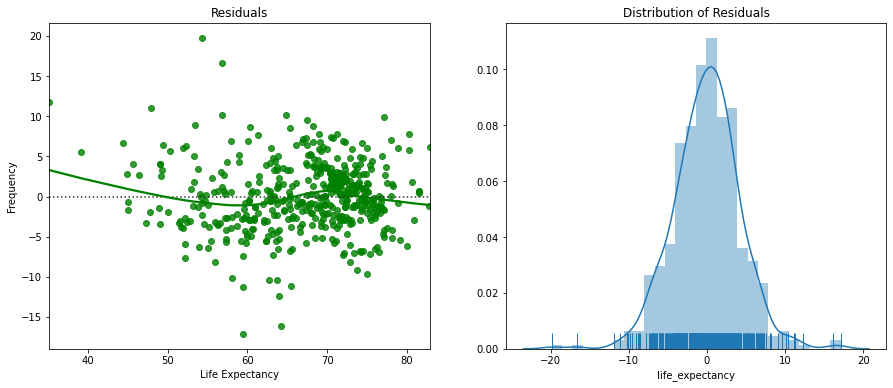

In [26]:
fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(121)
sns.residplot(y_test_pred, y_test, lowess=True, color="g", ax=ax1)
ax1.set_title("Residuals")
ax1.set_xlabel("Life Expectancy")

ax2 = plt.subplot(122)
sns.distplot((y_test_pred- y_test), kde=True, rug=True, ax=ax2)
ax2.set_title("Distribution of Residuals")
ax1.set_ylabel("Frequency")
plt.show()

Since the testing rmse is far worse than the training rmse, we overfit. This makes sense since we included every single column. Let's remove some using different methods below.

## Fourth Model - Poly 2 degree by removing features based on VIF score


In [85]:
X4 = features.copy()
y4 = df.life_expectancy

In [86]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(X4)
poly2_columns = poly_2.get_feature_names(X4.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__10-19_years,thinness_5-9_years,income_composition_of_resources,schooling,adult_mortality^2,adult_mortality infant_deaths,adult_mortality alcohol,adult_mortality percentage_expenditure,adult_mortality hepatitis_b,adult_mortality measles,adult_mortality bmi,adult_mortality under-five_deaths,adult_mortality polio,adult_mortality total_expenditure,adult_mortality diphtheria,adult_mortality hiv/aids,adult_mortality gdp,adult_mortality population,adult_mortality thinness__10-19_years,adult_mortality thinness_5-9_years,adult_mortality income_composition_of_resources,adult_mortality schooling,infant_deaths^2,infant_deaths alcohol,infant_deaths percentage_expenditure,infant_deaths hepatitis_b,infant_deaths measles,infant_deaths bmi,infant_deaths under-five_deaths,infant_deaths polio,infant_deaths total_expenditure,infant_deaths diphtheria,infant_deaths hiv/aids,infant_deaths gdp,infant_deaths population,infant_deaths thinness__10-19_years,infant_deaths thinness_5-9_years,infant_deaths income_composition_of_resources,infant_deaths schooling,alcohol^2,alcohol percentage_expenditure,alcohol hepatitis_b,alcohol measles,alcohol bmi,alcohol under-five_deaths,alcohol polio,alcohol total_expenditure,alcohol diphtheria,alcohol hiv/aids,alcohol gdp,alcohol population,alcohol thinness__10-19_years,alcohol thinness_5-9_years,alcohol income_composition_of_resources,alcohol schooling,percentage_expenditure^2,percentage_expenditure hepatitis_b,percentage_expenditure measles,percentage_expenditure bmi,percentage_expenditure under-five_deaths,percentage_expenditure polio,percentage_expenditure total_expenditure,percentage_expenditure diphtheria,percentage_expenditure hiv/aids,percentage_expenditure gdp,percentage_expenditure population,percentage_expenditure thinness__10-19_years,percentage_expenditure thinness_5-9_years,percentage_expenditure income_composition_of_resources,percentage_expenditure schooling,hepatitis_b^2,hepatitis_b measles,hepatitis_b bmi,hepatitis_b under-five_deaths,hepatitis_b polio,hepatitis_b total_expenditure,hepatitis_b diphtheria,hepatitis_b hiv/aids,hepatitis_b gdp,hepatitis_b population,hepatitis_b thinness__10-19_years,hepatitis_b thinness_5-9_years,hepatitis_b income_composition_of_resources,hepatitis_b schooling,measles^2,measles bmi,measles under-five_deaths,measles polio,measles total_expenditure,measles diphtheria,measles hiv/aids,measles gdp,measles population,measles thinness__10-19_years,measles thinness_5-9_years,measles income_composition_of_resources,measles schooling,bmi^2,bmi under-five_deaths,bmi polio,bmi total_expenditure,bmi diphtheria,bmi hiv/aids,bmi gdp,bmi population,bmi thinness__10-19_years,bmi thinness_5-9_years,bmi income_composition_of_resources,bmi schooling,under-five_deaths^2,under-five_deaths polio,under-five_deaths total_expenditure,under-five_deaths diphtheria,under-five_deaths hiv/aids,under-five_deaths gdp,under-five_deaths population,under-five_deaths thinness__10-19_years,under-five_deaths thinness_5-9_years,under-five_deaths income_composition_of_resources,under-five_deaths schooling,polio^2,polio total_expenditure,polio diphtheria,polio hiv/aids,polio gdp,polio population,polio thinness__10-19_years,polio thinness_5-9_years,polio income_composition_of_resources,polio schooling,total_expenditure^2,total_expenditure diphtheria,total_expenditure hiv/aids,total_expenditure gdp,total_expenditure population,total_expenditure thinness__10-19_years,total_expenditure thinness_5-9_years,total_expenditure income_composition_of_resources,total_expenditure schooling,diphtheria^2,diphtheria hiv/aids,diphtheria gdp,diphtheria population,diphtheria thinness__10-19_years,diphtheria thinness_5-9_years,diphtheria income_composition_of_resources,diphtheria schooling,hiv/aids^2,hiv/aids gdp,hiv/aids population,hiv/aids thinness__10-19_ye

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, y3, test_size=0.2, random_state=42)

In [88]:
## Remove with VIF

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,29.6,adult_mortality
1,387.1,infant_deaths
2,29.6,alcohol
3,35.3,percentage_expenditure
4,16.3,hepatitis_b
5,464.7,measles
6,29.7,bmi
7,410.1,under-five_deaths
8,15.7,polio
9,12.1,total_expenditure


In [89]:
# Take the 10% best columns based on VIF

## NOTE 66% of best features gives the best results, decreasing slowly makes model worse, and increaseing to 67 
## drastically reduces rmse

vif_features = list(vif[vif['VIF Factor'] <= np.percentile(vif['VIF Factor'], 66)]['features'])
#vif_features

In [90]:
#vif[vif['VIF Factor'] <= np.percentile(vif['VIF Factor'], 67)].sort_values(by='VIF Factor', ascending=False)

In [91]:
# Update X_train and X_test to only have these columns
X_train = X_train.copy()[vif_features]
X_test = X_test.copy()[vif_features]

In [92]:
scaler4 = StandardScaler()

# fit the scaler to the training data
scaler4.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler4.transform(X_train), columns=X_train.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler4.transform(X_test), columns=X_train.columns)

In [93]:
# instantiate a linear regression object
lm_4 = LinearRegression()

#fit the linear regression to the data
lm_4 = lm_4.fit(X_train, y_train)

y_train_pred = lm_4.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 2.7100667378478893


In [94]:
# use fitted model to predict on test data
y_pred = lm_4.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)
print(f"R2: {metrics.r2_score(y_test, y_pred)}")

Testing Root Mean Squared Error: 2.983068963973464
Training:  2.7100667378478893 vs. Testing:  2.983068963973464
R2: 0.8927400986045341


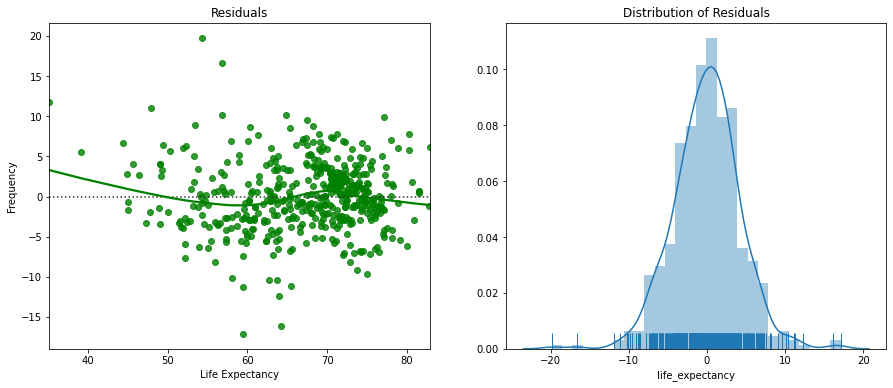

In [95]:
fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(121)
sns.residplot(y_test_pred, y_test, lowess=True, color="g", ax=ax1)
ax1.set_title("Residuals")
ax1.set_xlabel("Life Expectancy")

ax2 = plt.subplot(122)
sns.distplot((y_test_pred- y_test), kde=True, rug=True, ax=ax2)
ax2.set_title("Distribution of Residuals")
ax1.set_ylabel("Frequency")
plt.show()

In [97]:
#len(lm_4.coef_), len(X_train.columns)
coefs = pd.DataFrame(X_train.columns, lm_4.coef_, columns=['Feature']).reset_index().rename({'index':'Coef'}, axis=1)
top_15_pos_coefs = coefs.sort_values(by='Coef', ascending=False)[:15]
top_15_neg_coefs = coefs.sort_values(by='Coef', ascending=True)[:15]
print(top_15_neg_coefs)
print(top_15_pos_coefs)

          Coef                                            Feature
0   -16.770879                                    adult_mortality
123  -5.875321          income_composition_of_resources schooling
112  -3.288050                                 hiv/aids schooling
84   -3.281280                                      bmi schooling
11   -3.192617                    income_composition_of_resources
117  -2.828253  thinness__10-19_years income_composition_of_re...
8    -2.341454                                           hiv/aids
12   -2.167490                                          schooling
77   -2.099111                                     bmi diphtheria
42   -2.026921            alcohol income_composition_of_resources
115  -1.913249                            thinness__10-19_years^2
55   -1.701104          percentage_expenditure thinness_5-9_years
104  -1.641072                      diphtheria thinness_5-9_years
10   -1.600702                                 thinness_5-9_years
93   -1.56

#### Let's take a look at our top 15 best predictors from a positive ane a negative standpoint

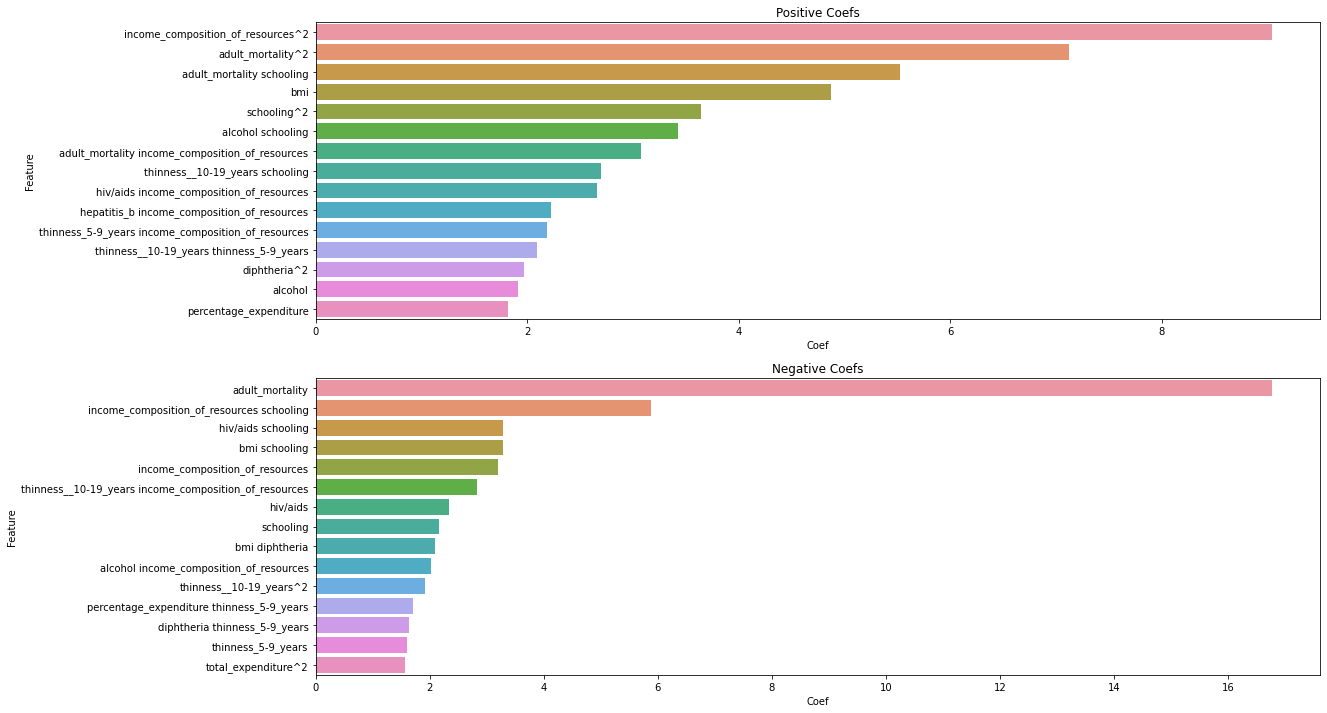

In [39]:
fig = plt.subplots(figsize=(18,12))

ax1 = plt.subplot(211)
ax1.set_title("Positive Coefs")
sns.barplot(y = top_15_pos_coefs.Feature, x = top_15_pos_coefs.Coef, ax=ax1)

ax2 = plt.subplot(212)
ax2.set_title("Negative Coefs")
sns.barplot(y = top_15_neg_coefs.Feature, x = abs(top_15_neg_coefs.Coef), ax=ax2)


# Fifth Model - Poly 2 degree by selecting best features (f-test, SelectKBest library)

Select KBest features using F Test.

In [40]:
X5 = features.copy()
y5 = df.life_expectancy

In [41]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(X5)
poly2_columns = poly_2.get_feature_names(X5.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__10-19_years,thinness_5-9_years,income_composition_of_resources,schooling,adult_mortality^2,adult_mortality infant_deaths,adult_mortality alcohol,adult_mortality percentage_expenditure,adult_mortality hepatitis_b,adult_mortality measles,adult_mortality bmi,adult_mortality under-five_deaths,adult_mortality polio,adult_mortality total_expenditure,adult_mortality diphtheria,adult_mortality hiv/aids,adult_mortality gdp,adult_mortality population,adult_mortality thinness__10-19_years,adult_mortality thinness_5-9_years,adult_mortality income_composition_of_resources,adult_mortality schooling,infant_deaths^2,infant_deaths alcohol,infant_deaths percentage_expenditure,infant_deaths hepatitis_b,infant_deaths measles,infant_deaths bmi,infant_deaths under-five_deaths,infant_deaths polio,infant_deaths total_expenditure,infant_deaths diphtheria,infant_deaths hiv/aids,infant_deaths gdp,infant_deaths population,infant_deaths thinness__10-19_years,infant_deaths thinness_5-9_years,infant_deaths income_composition_of_resources,infant_deaths schooling,alcohol^2,alcohol percentage_expenditure,alcohol hepatitis_b,alcohol measles,alcohol bmi,alcohol under-five_deaths,alcohol polio,alcohol total_expenditure,alcohol diphtheria,alcohol hiv/aids,alcohol gdp,alcohol population,alcohol thinness__10-19_years,alcohol thinness_5-9_years,alcohol income_composition_of_resources,alcohol schooling,percentage_expenditure^2,percentage_expenditure hepatitis_b,percentage_expenditure measles,percentage_expenditure bmi,percentage_expenditure under-five_deaths,percentage_expenditure polio,percentage_expenditure total_expenditure,percentage_expenditure diphtheria,percentage_expenditure hiv/aids,percentage_expenditure gdp,percentage_expenditure population,percentage_expenditure thinness__10-19_years,percentage_expenditure thinness_5-9_years,percentage_expenditure income_composition_of_resources,percentage_expenditure schooling,hepatitis_b^2,hepatitis_b measles,hepatitis_b bmi,hepatitis_b under-five_deaths,hepatitis_b polio,hepatitis_b total_expenditure,hepatitis_b diphtheria,hepatitis_b hiv/aids,hepatitis_b gdp,hepatitis_b population,hepatitis_b thinness__10-19_years,hepatitis_b thinness_5-9_years,hepatitis_b income_composition_of_resources,hepatitis_b schooling,measles^2,measles bmi,measles under-five_deaths,measles polio,measles total_expenditure,measles diphtheria,measles hiv/aids,measles gdp,measles population,measles thinness__10-19_years,measles thinness_5-9_years,measles income_composition_of_resources,measles schooling,bmi^2,bmi under-five_deaths,bmi polio,bmi total_expenditure,bmi diphtheria,bmi hiv/aids,bmi gdp,bmi population,bmi thinness__10-19_years,bmi thinness_5-9_years,bmi income_composition_of_resources,bmi schooling,under-five_deaths^2,under-five_deaths polio,under-five_deaths total_expenditure,under-five_deaths diphtheria,under-five_deaths hiv/aids,under-five_deaths gdp,under-five_deaths population,under-five_deaths thinness__10-19_years,under-five_deaths thinness_5-9_years,under-five_deaths income_composition_of_resources,under-five_deaths schooling,polio^2,polio total_expenditure,polio diphtheria,polio hiv/aids,polio gdp,polio population,polio thinness__10-19_years,polio thinness_5-9_years,polio income_composition_of_resources,polio schooling,total_expenditure^2,total_expenditure diphtheria,total_expenditure hiv/aids,total_expenditure gdp,total_expenditure population,total_expenditure thinness__10-19_years,total_expenditure thinness_5-9_years,total_expenditure income_composition_of_resources,total_expenditure schooling,diphtheria^2,diphtheria hiv/aids,diphtheria gdp,diphtheria population,diphtheria thinness__10-19_years,diphtheria thinness_5-9_years,diphtheria income_composition_of_resources,diphtheria schooling,hiv/aids^2,hiv/aids gdp,hiv/aids population,hiv/aids thinness__10-19_ye

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, y5, test_size=0.2, random_state=42)

In [43]:
selector = SelectKBest(f_regression, k=79) # This number is the best we found, we played with it a bit
selector.fit(X_train, y_train)

SelectKBest(k=79, score_func=<function f_regression at 0x121ed31f0>)

In [44]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [45]:
#list(selected_columns)

In [46]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)
print(f"R2: {metrics.r2_score(y_test, y_kbest)}")

Training Root Mean Squared Error: 3.2532393701184015
Testing Root Mean Squared Error: 3.4756362166156927
R2: 0.8543939454892358


From our results, it appears that we can not get as good of a model using an f test to select our best features. So far, selecting our best features via a VIF score has proven to be the best model.

# Sixth Model - Poly 2 degree by removing columns with Recursive Feature Elimination


In [47]:
X6 = features.copy()
y6 = df.life_expectancy

In [48]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(X6)
poly2_columns = poly_2.get_feature_names(X6.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__10-19_years,thinness_5-9_years,income_composition_of_resources,schooling,adult_mortality^2,adult_mortality infant_deaths,adult_mortality alcohol,adult_mortality percentage_expenditure,adult_mortality hepatitis_b,adult_mortality measles,adult_mortality bmi,adult_mortality under-five_deaths,adult_mortality polio,adult_mortality total_expenditure,adult_mortality diphtheria,adult_mortality hiv/aids,adult_mortality gdp,adult_mortality population,adult_mortality thinness__10-19_years,adult_mortality thinness_5-9_years,adult_mortality income_composition_of_resources,adult_mortality schooling,infant_deaths^2,infant_deaths alcohol,infant_deaths percentage_expenditure,infant_deaths hepatitis_b,infant_deaths measles,infant_deaths bmi,infant_deaths under-five_deaths,infant_deaths polio,infant_deaths total_expenditure,infant_deaths diphtheria,infant_deaths hiv/aids,infant_deaths gdp,infant_deaths population,infant_deaths thinness__10-19_years,infant_deaths thinness_5-9_years,infant_deaths income_composition_of_resources,infant_deaths schooling,alcohol^2,alcohol percentage_expenditure,alcohol hepatitis_b,alcohol measles,alcohol bmi,alcohol under-five_deaths,alcohol polio,alcohol total_expenditure,alcohol diphtheria,alcohol hiv/aids,alcohol gdp,alcohol population,alcohol thinness__10-19_years,alcohol thinness_5-9_years,alcohol income_composition_of_resources,alcohol schooling,percentage_expenditure^2,percentage_expenditure hepatitis_b,percentage_expenditure measles,percentage_expenditure bmi,percentage_expenditure under-five_deaths,percentage_expenditure polio,percentage_expenditure total_expenditure,percentage_expenditure diphtheria,percentage_expenditure hiv/aids,percentage_expenditure gdp,percentage_expenditure population,percentage_expenditure thinness__10-19_years,percentage_expenditure thinness_5-9_years,percentage_expenditure income_composition_of_resources,percentage_expenditure schooling,hepatitis_b^2,hepatitis_b measles,hepatitis_b bmi,hepatitis_b under-five_deaths,hepatitis_b polio,hepatitis_b total_expenditure,hepatitis_b diphtheria,hepatitis_b hiv/aids,hepatitis_b gdp,hepatitis_b population,hepatitis_b thinness__10-19_years,hepatitis_b thinness_5-9_years,hepatitis_b income_composition_of_resources,hepatitis_b schooling,measles^2,measles bmi,measles under-five_deaths,measles polio,measles total_expenditure,measles diphtheria,measles hiv/aids,measles gdp,measles population,measles thinness__10-19_years,measles thinness_5-9_years,measles income_composition_of_resources,measles schooling,bmi^2,bmi under-five_deaths,bmi polio,bmi total_expenditure,bmi diphtheria,bmi hiv/aids,bmi gdp,bmi population,bmi thinness__10-19_years,bmi thinness_5-9_years,bmi income_composition_of_resources,bmi schooling,under-five_deaths^2,under-five_deaths polio,under-five_deaths total_expenditure,under-five_deaths diphtheria,under-five_deaths hiv/aids,under-five_deaths gdp,under-five_deaths population,under-five_deaths thinness__10-19_years,under-five_deaths thinness_5-9_years,under-five_deaths income_composition_of_resources,under-five_deaths schooling,polio^2,polio total_expenditure,polio diphtheria,polio hiv/aids,polio gdp,polio population,polio thinness__10-19_years,polio thinness_5-9_years,polio income_composition_of_resources,polio schooling,total_expenditure^2,total_expenditure diphtheria,total_expenditure hiv/aids,total_expenditure gdp,total_expenditure population,total_expenditure thinness__10-19_years,total_expenditure thinness_5-9_years,total_expenditure income_composition_of_resources,total_expenditure schooling,diphtheria^2,diphtheria hiv/aids,diphtheria gdp,diphtheria population,diphtheria thinness__10-19_years,diphtheria thinness_5-9_years,diphtheria income_composition_of_resources,diphtheria schooling,hiv/aids^2,hiv/aids gdp,hiv/aids population,hiv/aids thinness__10-19_ye

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, y6, test_size=0.2, random_state=42)

In [50]:
ols = linear_model.LinearRegression()

In [51]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error')

In [52]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [53]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)
print(f"R2: {metrics.r2_score(y_test, y_pred_rfe)}")

Training Root Mean Squared Error: 2.5203052628884546
Testing Root Mean Squared Error: 4.457950919513733
R2: 0.7604581653685218


Of our 3 methods of removing columns from our polynomial model, this one performed the worst. The training error is great, but the testing error is not, meaning we overfit our data.

In [54]:
#df[df.income_composition_of_resources == 0]

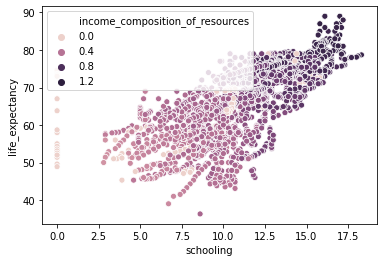

In [55]:
sns.scatterplot(x=df.schooling, y=df.life_expectancy, hue=df.income_composition_of_resources)

In [82]:
scaled_schooling = (df.schooling-min(df.schooling))/(max(df.schooling)-min(df.schooling))
scaled_schooling

scaled_income = (df.income_composition_of_resources - min(df.income_composition_of_resources)) / (max(df.income_composition_of_resources) - min(df.income_composition_of_resources))


schooling_income = df.income_composition_of_resources * scaled_schooling
schooling_income = (schooling_income-min(schooling_income))/(max(schooling_income)-min(schooling_income))
schooling_income.describe()
    

count    2416.000000
mean        0.438900
std         0.223119
min         0.000000
25%         0.262833
50%         0.456168
75%         0.599653
max         1.000000
dtype: float64

Text(0.5, 0, 'Normalized Schooling and Income Comp (Same Scale)')

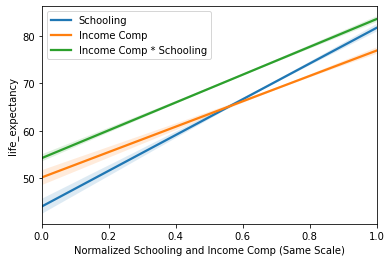

In [83]:
sns.regplot(x=scaled_schooling, y=df.life_expectancy, scatter=False, label = 'Schooling')
sns.regplot(x=scaled_income, y=df.life_expectancy, scatter=False, label = 'Income Comp')
sns.regplot(x=schooling_income, y=df.life_expectancy,
            scatter=False, label = 'Income Comp * Schooling')
plt.legend()
plt.xlabel("Normalized Schooling and Income Comp (Same Scale)")
